# Linear Regression
To get familiar with automatic differentiation, we start by learning a simple linear regression model using Stochastic Gradient Descent (SGD).

Recall that given a dataset $\{(x_i, y_i)\}_{i=0}^N$, with $x_i, y_i \in \mathbb{R}$, the objective of linear regression is to find two scalars $w$ and $b$ such that $y = w\cdot x + b$ fits the dataset. In this tutorial we will learn $w$ and $b$ using SGD and a Mean Square Error (MSE) loss:

$$\mathcal{l} = \frac{1}{N} \sum_{i=0}^N (w\cdot x_i + b - y_i)^2$$

Starting from random values, parameters $w$ and $b$ will be updated at each iteration via the following rule:

$$w_t = w_{t-1} - \eta \frac{\partial \mathcal{l}}{\partial w}$$
<br>
$$b_t = b_{t-1} - \eta \frac{\partial \mathcal{l}}{\partial b}$$

where $\eta$ is the learning rate.

**NOTE:** Recall that **linear regression** is indeed a **simple neuron** with a linear activation function!!

## Placeholders and variables
To implement and run this simple model, we will use the [Keras backend module](http://keras.io/backend/), which provides an abstraction over Theano and Tensorflow, two popular tensor manipulation libraries that provide automatic differentiation.

First of all, we define the necessary variables and placeholders for our computational graph. Variables maintain state across executions of the computational graph, while placeholders are ways to feed the graph with external data.

For the linear regression example, we need three variables: `w`, `b`, and the learning rate for SGD, `lr`. Two placeholders `x` and `target` are created to store $x_i$ and $y_i$ values.

In [1]:
import keras.backend as K
import numpy as np

# Placeholders and variables
x = K.placeholder()
target = K.placeholder()
lr = K.variable(0.1)
w = K.variable(np.random.rand())
b = K.variable(np.random.rand())

Using TensorFlow backend.


## Model definition
Now we can define the $y = w\cdot x + b$ relation as well as the MSE loss in the computational graph.

In [2]:
# Define model and loss
y = w * x + b
loss = K.mean(K.square(y-target))

Then, given the gradient of MSE wrt to `w` and `b`, we can define how we update the parameters via SGD:

In [3]:
grads = K.gradients(loss, [w,b])
updates = [(w, w-lr*grads[0]), (b, b-lr*grads[1])]

The whole model can be encapsulated in a `function`, which takes as input `x` and `target`, returns the current loss value and updates its parameter according to `updates`.

In [4]:
train = K.function(inputs=[x, target], outputs=[loss], updates=updates)

## Training
Training is now just a matter of calling the `function` we have just defined. Each time `train` is called, indeed, `w` and `b` will be updated using the SGD rule.

Having generated some random training data, we will feed the `train` function for several epochs and observe the values of `w`, `b`, and loss.

In [5]:
# Generate data
np_x = np.random.rand(1000)
np_target = 0.96*np_x + 0.24

# Training
loss_history = []
for epoch in range(200):
    current_loss = train([np_x, np_target])[0]
    loss_history.append(current_loss)
    if epoch % 20 == 0:
        print("Loss: %.03f, w, b: [%.02f, %.02f]" % (current_loss, K.eval(w), K.eval(b)))

Loss: 0.045, w, b: [0.48, 0.38]
Loss: 0.010, w, b: [0.64, 0.41]
Loss: 0.006, w, b: [0.72, 0.37]
Loss: 0.003, w, b: [0.78, 0.34]
Loss: 0.002, w, b: [0.82, 0.31]
Loss: 0.001, w, b: [0.86, 0.30]
Loss: 0.001, w, b: [0.88, 0.28]
Loss: 0.000, w, b: [0.90, 0.27]
Loss: 0.000, w, b: [0.92, 0.26]
Loss: 0.000, w, b: [0.93, 0.26]


We can also plot the loss history:

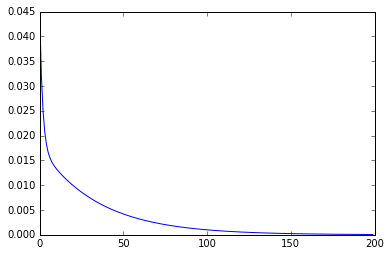

In [6]:
# Plot loss history
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(loss_history)

## Your Turn

Please switch to the **Theano** backend and re-run the notebook.

You _should_ see no difference in the execution!

**Reminder**: please keep in mind that you *can* execute shell commands from a notebook (pre-pending a `!` sign).
Thus:

```shell
    !cat ~/.keras/keras.json
```
should show you the content of your keras configuration file.

## Logistic Regression

Let's try to re-implement the Logistic Regression Model using the `keras.backend` APIs.

The following code will look like very similar to what we would write in Theano or Tensorflow - with the *only difference* that it may run on both the two backends.

In [7]:
from kaggle_data import load_data, preprocess_data, preprocess_labels

In [8]:
X_train, labels = load_data('data/kaggle_ottogroup/train.csv', train=True)
X_train, scaler = preprocess_data(X_train)
Y_train, encoder = preprocess_labels(labels)

X_test, ids = load_data('data/kaggle_ottogroup/test.csv', train=False)

X_test, _ = preprocess_data(X_test, scaler)

nb_classes = Y_train.shape[1]
print(nb_classes, 'classes')

dims = X_train.shape[1]
print(dims, 'dims')

9 classes
93 dims


In [9]:
feats = dims
training_steps = 25

In [10]:
x = K.placeholder(dtype="float", shape=X_train.shape) 
target = K.placeholder(dtype="float", shape=Y_train.shape)

# Set model weights
W = K.variable(np.random.rand(dims, nb_classes))
b = K.variable(np.random.rand(nb_classes))

In [11]:
# Define model and loss
y = K.dot(x, W) + b
loss = K.categorical_crossentropy(y, target)

In [12]:
activation = K.softmax(y) # Softmax

In [13]:
# Minimize error using cross entropy
cross_entropy = K.categorical_crossentropy(activation, target)
loss = K.mean(-K.sum(cross_entropy))

In [14]:
grads = K.gradients(loss, [W,b])
updates = [(W, W-lr*grads[0]), (b, b-lr*grads[1])]

In [15]:
train = K.function(inputs=[x, target], outputs=[loss], updates=updates)

In [16]:
# Training
loss_history = []
for epoch in range(training_steps):
    current_loss = train([X_train, Y_train])[0]
    loss_history.append(current_loss)
    if epoch % 20 == 0:
        print("Loss: {}".format(current_loss))

Loss: -218494.890625
Loss: -989694.875


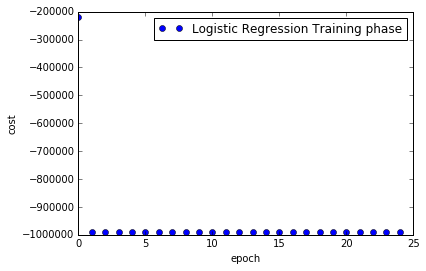

In [18]:
#plotting
plt.plot(range(len(loss_history)), loss_history, 'o', label='Logistic Regression Training phase')
plt.ylabel('cost')
plt.xlabel('epoch')
plt.legend()
plt.show()